In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def plotSensor(array: iter, title: str, x_label: str, y_label: str):
    x = np.linspace(-40, 40, num=17)
    plt.figure(figsize=(10,4))
    for i in range(0, 8):
        plt.plot(x, array[:,i], marker='o', label=f'S{i}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

[[1733.  669.  645.  575.  575.  528.  528.  693.]
 [1718.  678.  654.  584.  584.  538.  538.  702.]
 [1718.  678.  654.  584.  584.  538.  538.  702.]
 [1718.  678.  654.  584.  584.  538.  538.  702.]
 [1718.  678.  654.  584.  584.  538.  538.  702.]
 [2500.  810.  669.  575.  575.  528.  552.  716.]
 [2500.  819.  678.  584.  584.  538.  561.  725.]
 [2500.  819.  678.  584.  584.  538.  561.  725.]
 [2500.  819.  678.  584.  584.  538.  561.  701.]
 [2500.  819.  678.  584.  584.  538.  561.  725.]
 [1612. 1636.  668.  575.  598.  528.  552.  716.]
 [1597. 1621.  678.  584.  584.  538.  561.  725.]
 [1597. 1621.  678.  584.  607.  538.  538.  725.]
 [1597. 1621.  678.  584.  607.  538.  561.  701.]
 [1597. 1621.  678.  584.  607.  538.  561.  725.]
 [ 809. 2500.  833.  598.  598.  528.  552.  715.]
 [ 818. 2500.  842.  607.  607.  538.  561.  724.]
 [ 818. 2500.  842.  607.  607.  538.  561.  724.]
 [ 818. 2500.  842.  607.  607.  538.  561.  724.]
 [ 818. 2500.  842.  607.  607.

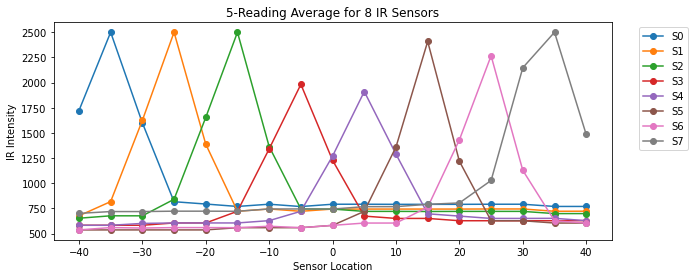

In [100]:
file_path = '../Documentation/Calibration/'
file_name = 'sensorcalibration_28042022_2249.txt'
input_file = file_path + file_name

# (5*11) x 9 array generated
data_raw = np.genfromtxt(input_file, delimiter=',')
# Remove empty 9th row, now (5*11) x 8 array
data_raw = np.delete(data_raw, 8, 1)

print(data_raw)

# Calculate means of every 5 rows
# 11 x 8 array of means
data_mean = np.empty((17, 8))
for i in range(17):
    data_mean[i] = np.mean(data_raw[5*i:5*i+5], 0)
print(data_mean)

# Plot
plotSensor(data_mean, '5-Reading Average for 8 IR Sensors', 'Sensor Location', 'IR Intensity')

[768.2 676.2 652.2 582.2 582.2 536.  536.  700.2]


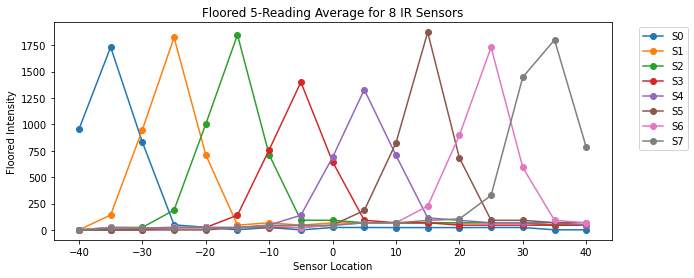

In [94]:
# Normalization

# Flooring
data_min = np.amin(data_mean, 0)
print(data_min)
#print(data_min)
data_floor = data_mean.copy()
for idx, subtrahend in enumerate(data_min):
    data_floor[:,idx] -= subtrahend
#print(data_floor)
#print(data_floor[:,0])
plotSensor(data_floor, 'Floored 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Floored Intensity')

[ 952.8 1731.8  947.8 1823.8 1001.6 1847.8  758.8 1399.8  687.8 1328.8
  824.2 1872.2  895.4 1730.2 1447.2 1799.8  784. ]


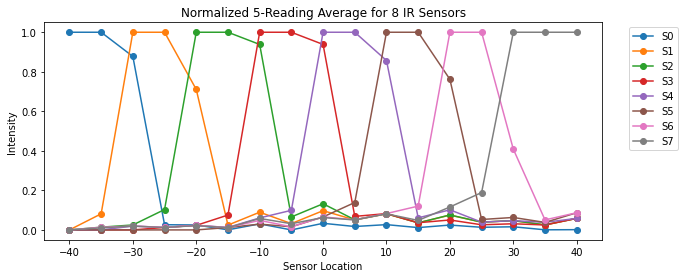

In [95]:
# Max scaling
data_max = np.max(data_floor, 1)
print(data_max)
data_norm = data_floor.copy()
for idx, subtrahend in enumerate(data_max):
    data_norm[idx] /= data_max[idx]
    #data_norm[idx] *= 1000
plotSensor(data_norm, 'Normalized 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Intensity')

In [98]:
# Applying Weights

# Distance errors (mm)
errors = np.linspace(-40, 40, num=17)

# Weights
weights = [-8, -4, -2, -1, 1, 2, 4, 8]
weights = [num / 4. for num in weights]
print(weights)
#print(data_norm)
fusion = [np.sum(np.multiply(row, weights)) for row in data_norm]

suffix = file_name.lstrip('sensorcalibration_')
export = open(f'{file_path}fusion_{suffix}', 'w')
export.writelines('\n'.join(fusion))

[-2.0, -1.0, -0.5, -0.25, 0.25, 0.5, 1.0, 2.0]


TypeError: sequence item 0: expected str instance, numpy.float64 found